# The Sparks Foundation - GRIP July 2021

## Task 1: Prediction using Supervised Machine Learning

### By : Siddhesh Bangar

In [55]:
#Importing all the libraries that are required in this notebook

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Reading the Data

In [56]:
#Reading the data

url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(url)
print("Data Imported Successfully")
df.head()

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [57]:
df.shape

(25, 2)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [59]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Plotting the Distribution of Scores

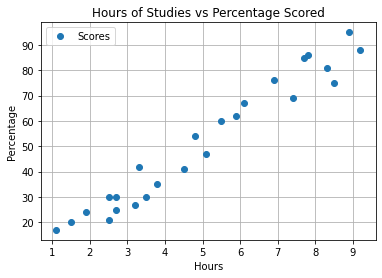

In [60]:
df.plot(x='Hours',y='Scores', style='o', grid=True, legend=True)
plt.title("Hours of Studies vs Percentage Scored")
plt.xlabel("Hours")
plt.ylabel("Percentage")
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

### Preparing the Data

#### Divide the data into "attributes" and "labels"

In [61]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

#### Once we have attributes and labels, next we have to split the data in our training and test sets.

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
xtrain, xtest, ytrain, ytest = train_test_split(x ,y ,test_size = 0.2 ,random_state = 0) 

#### Once the data is split into training and test sets, then next we have to train our algorithm.

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)
print("Training Successfully completed")

Training Successfully completed


In [66]:
print("Intercept :", reg.intercept_)
print("Co-efficent :", reg.coef_)

Intercept : 2.018160041434683
Co-efficent : [9.91065648]


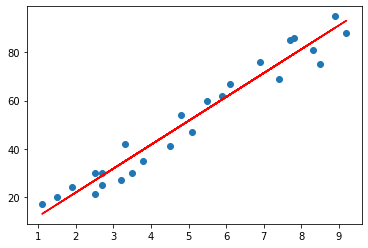

In [67]:
#Plotting the regression line
line = reg.coef_*x+reg.intercept_

#Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line, color='Red')
plt.show()

### Making Predictions

In [68]:
#Test of data in hours
print(xtest)  

#Predicting the scores
ypred = reg.predict(xtest)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [69]:
#Comparing Actual vs Predicted 
df2=pd.DataFrame({"Actual": ytest, "Predicted": ypred})
df2.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [70]:
reg.score(x, y)

0.9526947647057274

### Evaluating the Model

In [71]:
from sklearn import metrics

In [72]:
print("Mean Absolute Error :",metrics.mean_absolute_error(ytest, ypred))
print("Mean Squared Error :", metrics.mean_squared_error(ytest, ypred))
print("Root mean squared Error :", np.sqrt(metrics.mean_squared_error(ytest, ypred)))

Mean Absolute Error : 4.183859899002975
Mean Squared Error : 21.5987693072174
Root mean squared Error : 4.6474476121003665


In [73]:
hours = 9.25
value1= np.array([hours])
value1= value1.reshape(-1,1)
ownprediction = reg.predict(value1)
print("The Predicted Score for 9.25 Hours is :",format(ownprediction[0]))

The Predicted Score for 9.25 Hours is : 93.69173248737538


#### Conclusion : The Predicted Percentage / Score for studying for 9.25 hours is 93.69 %